# GBM Exact Simulaton

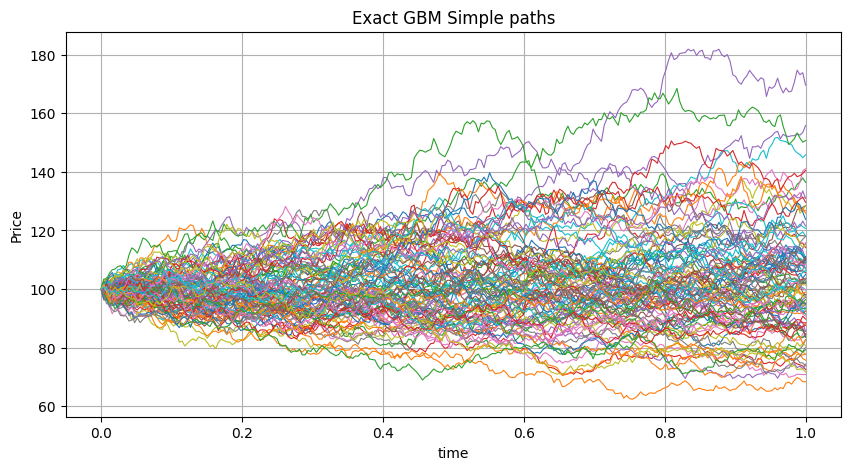

Monte carlo Mean:  104.94564899843978
Theoretical Mean:  105.12710963760242
Monte Carlo Variance:  446.3844992911212
Theoretical Variance:  451.0288078157963


In [36]:

import numpy as np
import matplotlib.pyplot as plt

So=100
mu=0.05
sigma=0.2
T=1
N=252
dt=T/N
paths=10000

t=np.linspace(0,T,N+1)
S_paths=np.zeros((paths,N+1))

for p in range(paths):
   Z=np.random.randn(N)
   W=np.insert(np.cumsum(np.sqrt(dt)*Z),0,0)
   S_paths[p]=So*np.exp((mu-0.5*sigma**2)*t+sigma*W)


plt.figure(figsize=(10,5))
for i in range(100):
  plt.plot(t,S_paths[i],lw=0.8)
plt.title("Exact GBM Simple paths")
plt.xlabel("time")
plt.ylabel("Price")
plt.grid(True)
plt.show()

ST=S_paths[:,-1]

print("Monte carlo Mean: ",np.mean(ST))
print("Theoretical Mean: ",So*np.exp(mu*T))
print("Monte Carlo Variance: ",np.var(ST))
print("Theoretical Variance: ",
      (So**2)*np.exp(2*mu*T)*(np.exp(sigma**2*T)-1))

# Euler–Maruyama Scheme for GBM

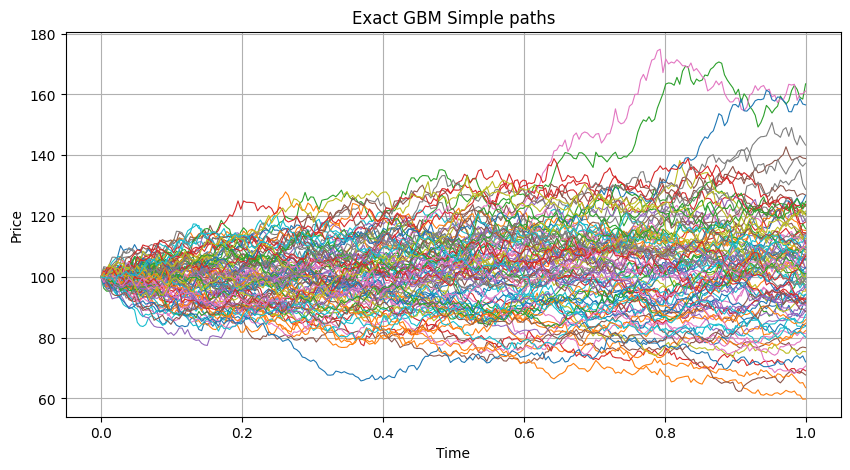

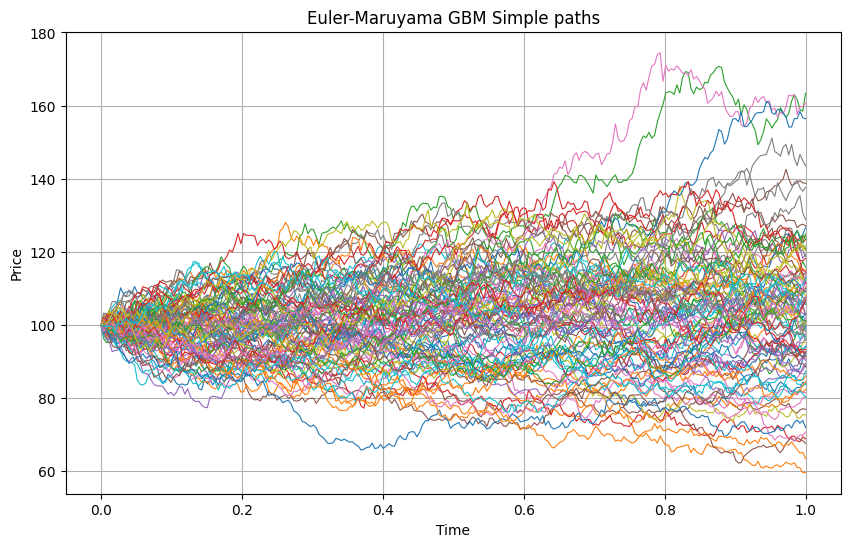

Exact Mean: 104.96319099149261
Euler–Maruyama Mean: 104.96134281503666
Exact Variance: 455.338569389893
Euler–Maruyama Variance: 455.13621438622783


In [37]:
import numpy as np
import matplotlib.pyplot as plt

So=100
mu=0.05
sigma=0.2
T=1
N=252
dt=T/N
paths=10000

t=np.linspace(0,T,N+1)

Z=np.random.randn(paths,N)
dW=np.sqrt(dt)*Z
W=np.cumsum(dW,axis=1)
W=np.column_stack([np.zeros(paths),W])

#Exact Solution
S_exact=So*np.exp((mu-0.5*sigma**2)*t+sigma*W)
#Euler-Maruyama Solution
S_em=np.zeros((paths,N+1))
S_em[:,0]=So

for n in range(N):
  S_em[:,n+1]=S_em[:,n]+mu*S_em[:,n]*dt + sigma*S_em[:,n]*dW[:,n]


#plot exactGBMpaths
plt.figure(figsize=(10,5))
for i in range(100):
  plt.plot(t,S_exact[i],lw=0.8)
plt.title("Exact GBM Simple paths")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()

#plot Euler-Maruyama GBM simple paths
plt.figure(figsize=(10,6))
for i in range(100):
  plt.plot(t,S_em[i],lw=0.8)
plt.title("Euler-Maruyama GBM Simple paths")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()

#Terminal distribution comparison(numeric)
ST_exact=S_exact[:,-1]
ST_em = S_em[:, -1]

print("Exact Mean:", np.mean(ST_exact))
print("Euler–Maruyama Mean:", np.mean(ST_em))
print("Exact Variance:", np.var(ST_exact))
print("Euler–Maruyama Variance:", np.var(ST_em))

# Day 3:Convergence Analysis (Strong and Weak Error)

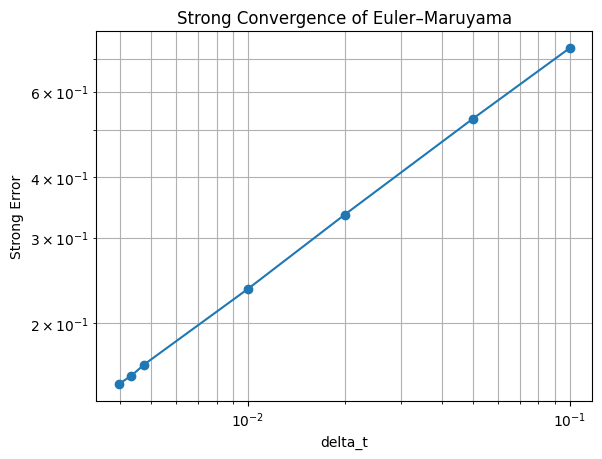

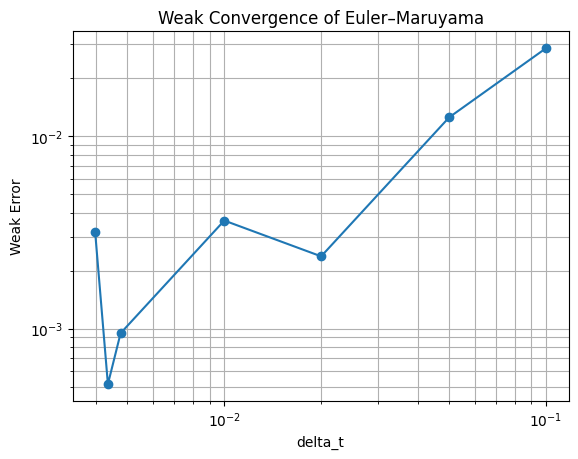

In [38]:
import numpy as np
import matplotlib.pyplot as plt

So = 100
mu = 0.05
sigma = 0.2
T = 1
paths = 10000


N_list = [10, 20, 50, 100, 210,230,252]

strong_errors = []
weak_errors = []
dt_list = []


for N in N_list:
    dt = T / N
    dt_list.append(dt)

    t = np.linspace(0, T, N+1)

    Z = np.random.randn(paths, N)
    dW = np.sqrt(dt) * Z
    W = np.cumsum(dW, axis=1)
    W = np.column_stack([np.zeros(paths), W])

    #exact GBM
    S_exact = So * np.exp(
        (mu - 0.5 * sigma**2) * t + sigma * W
    )

    #Euler–Maruyama
    S_em = np.zeros((paths, N+1))
    S_em[:, 0] = So

    for n in range(N):
        S_em[:, n+1] = (
            S_em[:, n]
            + mu * S_em[:, n] * dt
            + sigma * S_em[:, n] * dW[:, n]
        )

    # Strong error
    strong_error = np.mean(
        np.abs(S_em[:, -1] - S_exact[:, -1])
    )
    strong_errors.append(strong_error)

    # Weak error
    weak_error = abs(
        np.mean(S_em[:, -1]) - np.mean(S_exact[:, -1])
    )
    weak_errors.append(weak_error)

# Strong convergence plot
plt.figure()
plt.loglog(dt_list, strong_errors, 'o-')
plt.xlabel("delta_t")
plt.ylabel("Strong Error")
plt.title("Strong Convergence of Euler–Maruyama")
plt.grid(True, which="both")
plt.show()


# Weak convergence plot
plt.figure()
plt.loglog(dt_list, weak_errors, 'o-')
plt.xlabel("delta_t")
plt.ylabel("Weak Error")
plt.title("Weak Convergence of Euler–Maruyama")
plt.grid(True, which="both")
plt.show()


# Day 4: Financial Metrics from GBM Simulation

Mena terminal Log-returns:  0.028473369249283776
Volatility:  0.19883376959203156
Sharpe_ratio:  0.14320187817042157


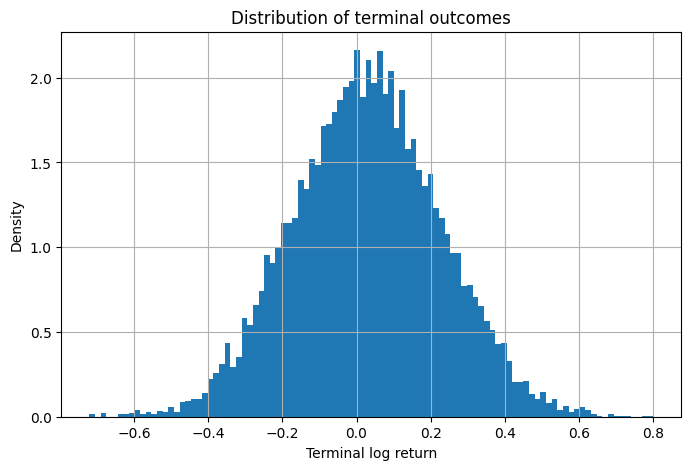

In [39]:
import numpy as np
import matplotlib.pyplot as plt

ST=S_paths[:,-1]
returns=np.log(ST/So)
mean_return=np.mean(returns)
print("Mena terminal Log-returns: ",mean_return)

volatility=np.std(returns)
print("Volatility: ",volatility)

sharpe_ratio=mean_return/volatility
print("Sharpe_ratio: ",sharpe_ratio)

plt.figure(figsize=(8,5))
plt.hist(returns,bins=100,density=True)
plt.xlabel("Terminal log return")
plt.ylabel("Density")
plt.title("Distribution of terminal outcomes")
plt.grid(True)
plt.show()